In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go




In [149]:
sasa=pd.read_csv("/Users/Bora/Documents/GitHub/Vestel-Hisse-Analizi/SASA.csv")
sasa.index=pd.to_datetime(sasa["Date"])


In [150]:
del sasa["Date"]

In [151]:
sasa=pd.DataFrame(sasa)

In [152]:
close=pd.DataFrame(sasa["Price"])

close

,Price
Date,
2022-01-03,11.576
2022-01-04,12.054
2022-01-05,12.087
2022-01-06,11.913
2022-01-07,12.000
...,...
2023-06-12,62.600
2023-06-13,56.350
2023-06-14,54.950


In [153]:
rolling_app5=close.rolling(window=5).mean()
rolling_app14=close.rolling(window=14).mean()
rolling_app21=close.rolling(window=21).mean()


In [154]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [155]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2022-01-31,10.191,10.4078,10.841000,11.224762
2022-02-01,10.539,10.3842,10.744429,11.175381
2022-02-02,10.283,10.3668,10.654429,11.091048
2022-02-03,10.078,10.2764,10.541214,10.995381
2022-02-04,10.322,10.2826,10.447786,10.919619
...,...,...,...,...
2023-06-12,62.600,65.3400,58.165714,53.526619
2023-06-13,56.350,63.3400,58.572857,54.230667
2023-06-14,54.950,61.0700,59.025000,54.900143


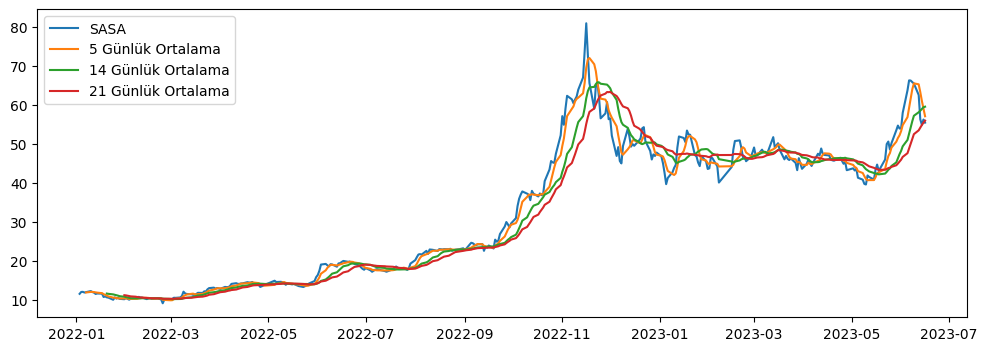

In [157]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='SASA')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='14 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='21 Günlük Ortalama')
ax.legend(loc='upper left')


In [158]:
def buy_sell(data,perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [159]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

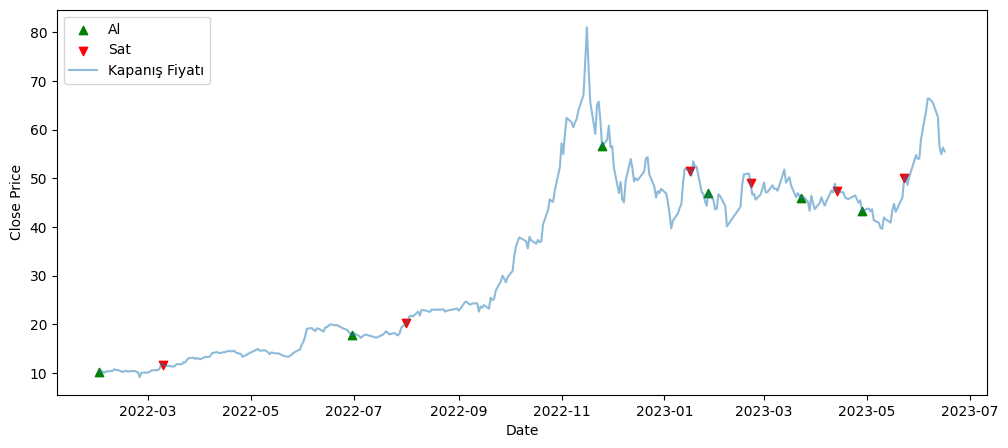

In [160]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

In [161]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2022-01-31    10.191
2022-06-30    17.757
2022-11-25    56.609
2023-01-27    46.957
2023-03-23    45.913
2023-04-28    43.304
Name: Al, dtype: float64

In [221]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)


In [222]:
sat

Date
2022-03-10    11.674
2022-08-01    20.217
2023-01-16    51.565
2023-02-21    49.087
2023-04-13    47.478
2023-05-23    50.000
Name: Sat, dtype: float64

In [223]:
sat_val=sat.values
al_val=al.values


In [224]:
res=[]

for i in range(6):
    res.append((sat_val[i]/al_val[i]))




In [225]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.145521
1,1.138537
2,0.910898
3,1.045361
4,1.034086
5,1.154628


In [226]:
df["Eldeki Para"]=df["Kar"]*100
df  

,Kar,Eldeki Para
0,1.145521,114.552056
1,1.138537,113.853692
2,0.910898,91.089756
3,1.045361,104.536065
4,1.034086,103.408621
5,1.154628,115.462775


In [227]:
df["Son Kar"]=df["Eldeki Para"]-100
df

,Kar,Eldeki Para,Son Kar
0,1.145521,114.552056,14.552056
1,1.138537,113.853692,13.853692
2,0.910898,91.089756,-8.910244
3,1.045361,104.536065,4.536065
4,1.034086,103.408621,3.408621
5,1.154628,115.462775,15.462775


In [228]:

df["Yatırılan Para"]=[100,100,100,100,100,100]


In [229]:
karlilik=df["Eldeki Para"].sum()/df["Yatırılan Para"].sum()
karlilik

1.0715049394120184

In [230]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 7.150493941201841


Her sat tavsiyesinde satmayıp 3.sat tavsiyesinde satarsak ne olur?(Yani 2 adet sat tavsiyesini pas geçersek)

In [231]:
sat_val1=sat_val[2:6:3]

In [232]:
sat_val1

array([51.565, 50.   ])

In [233]:
al_val1=al_val[0:6:3]
al_val1

array([10.191, 46.957])

In [234]:
res1=[]

for i in range(2):
    res1.append((sat_val1[i]/al_val1[i]))

In [235]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,5.059857
1,1.064804


In [236]:
df1["Eldeki Para"]=df1["Kar"]*100
df1 

,Kar,Eldeki Para
0,5.059857,505.985674
1,1.064804,106.480397


In [237]:
df1["Son Kar"]=df1["Eldeki Para"]-100

In [238]:
df1["Yatırılan Para"]=[100,100]

In [239]:
df1

,Kar,Eldeki Para,Son Kar,Yatırılan Para
0,5.059857,505.985674,405.985674,100
1,1.064804,106.480397,6.480397,100


İlk aşamada 100 TL yatırıp 505 TL kazanırız,2.aşamada ise 100 TL yatırıp 106 TL kazanırız ve toplamda 200 TL yatırıp 612 TL kazanmış oluruz.

In [240]:
karlilik=df1["Eldeki Para"].sum()/df1["Yatırılan Para"].sum()
karlilik

3.0623303529625905

In [241]:
karlilik_yuzde=(karlilik-1)*100
print("Karlılık oranı %",karlilik_yuzde)

Karlılık oranı % 206.23303529625906
